In [1]:
import pandas as pd
import matplotlib.pyplot as plt


**R ́ecup ́erer des donn ́ees `a partir de fichier advertising.scv et d ́ecouvrir ses principales caract ́eristiques**

In [2]:
data_adver = pd.read_csv('advertising.csv')
data_adver.head(6)

TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9
5    8.7   48.9       75.0    7.2

**2. Initialiser X (predictors, variable ind ́ependante) par la variable TV et y (cible, variable d ́ependante)**

In [ ]:
X = data_adver['TV']
y = data_adver['Sales']

print('Variable indep X:\n',X)
print('Variable cible y:\n',y)

**3. Pourquoi il s’agit d’un probl`eme de r ́egression**
*Il s'agit d'un problème de régression car l'objectif est de prédire une valeur continue en fonction de plusieurs variables indépendantes*

**4. Visualiser la base de donn ́ees avec matplotlib.**

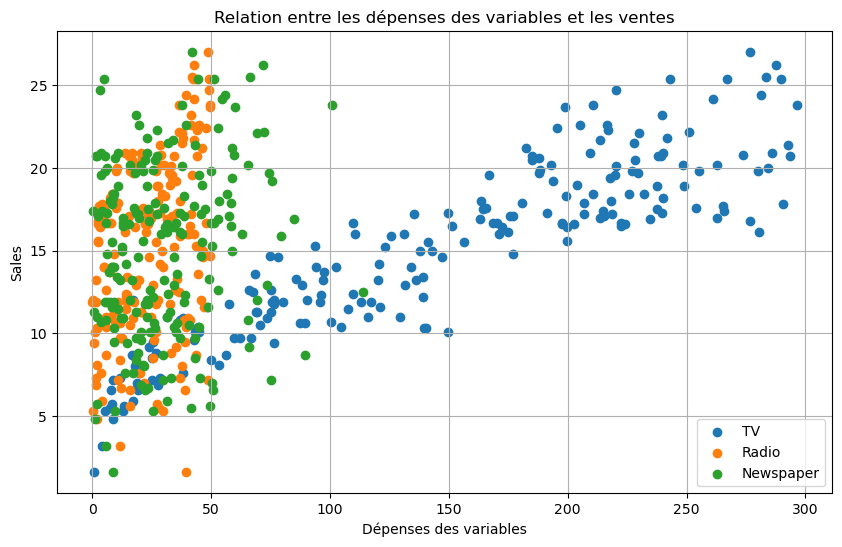

In [90]:
plt.figure(figsize=(10, 6))
plt.scatter(data_adver['TV'], data_adver['Sales'], label='TV')
plt.scatter(data_adver['Radio'], data_adver['Sales'], label='Radio')
plt.scatter(data_adver['Newspaper'], data_adver['Sales'], label='Newspaper')
plt.xlabel('Dépenses des variables')
plt.ylabel('Sales')
plt.title('Relation entre les dépenses des variables et les ventes')
plt.legend()
plt.grid(True)

plt.show()


In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import numpy as np
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [167]:
'''
MSE(X,y,W) qui retourne la moyenne des erreurs entre la valeur th ́eorique et la valeur
r eelle
'''
def mse(X, y,W):
    y_pred = W[0] + W[1] * X
    mse = ((y - y_pred) ** 2).mean()
    return mse

def gradient(X, y, w):
    grad = []
    y_pred = w[0] + w[1] * X
    grad.append((-2 * (y - y_pred).mean()) / len(y))
    grad.append((-2 * (X * (y - y_pred)).mean()) / len(y))
    return grad

def miseJour(grad,w,alfa): 
    # Mise à jour des coefficients
    w[0] = w[0] - alfa * grad[0]
    w[1] = w[1] - alfa * grad[1]

    return w

def batchGradDesc(X,y,W,N_max,alfa,eps):
    erreurs = []
    for i in range(N_max):
        mq=mse(X,y,W)
        grad = gradient(X,y,W)
        W = miseJour(grad,W,alfa)
        erreurs.append(mq)
        #print('mse: ',mq)
        if mq < eps:
            break
    return W, mq,erreurs
    


** Batch Gradient Descent(X,y,W,N max,alpha,eps), qui retourne les meilleurs param`etres es-
tim ́es et de plus affiche l’ ́evolution de MSE apr`es chaque it ́eration **

In [168]:
W = [0,0]
w,mse,errs = batchGradDesc(x_train,y_train,W,100,0.001,10)
print('meilleure erreur: ',mse)
print('les poids: ',w)

meilleure erreur:  16.742180919539816
les poids:  [0.0025574319066301978, 0.09099847125718255]


**Tracer l’MSE**

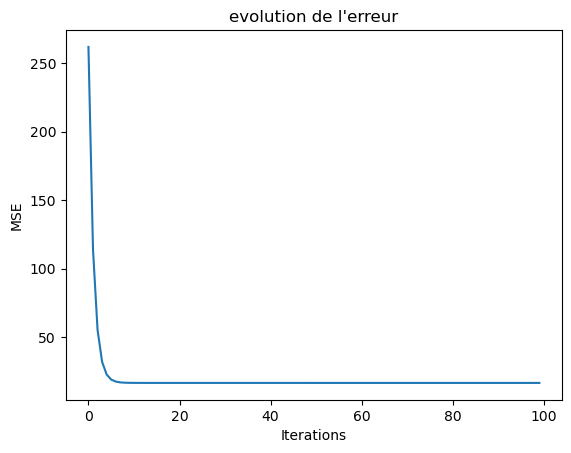

In [159]:
plt.plot(errs)
plt.title("evolution de l'erreur")
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.show()